In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.shape

(20640, 10)

### Data pre-processing: remove NaN

In [4]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
housing['total_bedrooms'].fillna((housing['total_bedrooms'].mean()), inplace=True)
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Data pre-processing: Convert categorical data to numerical data - "ocean_proximity"

In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
#We can use one-hot encoding method by calling pd.get_dummies
categorical_columns=['ocean_proximity'] # must be a list
housing = pd.get_dummies(housing, columns=categorical_columns)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


### Visualize the data

Text(0.5, 1.0, 'median_income')

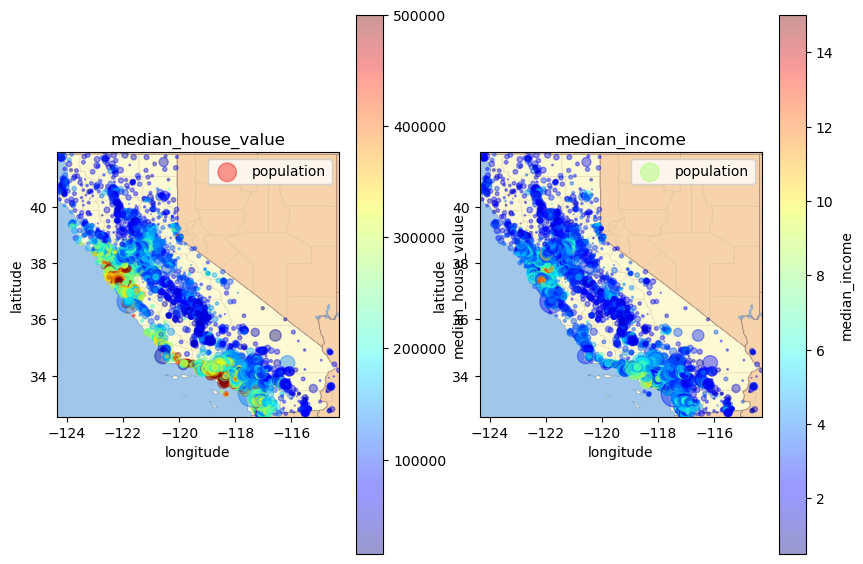

In [8]:
from skimage.io import imread
california_img = imread('california.png')
x1 = min(housing["longitude"].values)
x2 = max(housing["longitude"].values)
y1 = min(housing["latitude"].values)
y2 = max(housing["latitude"].values)
#---------------------------------------------
# the parameter c refers to color
# thus, median_house_value is color-coded in the left plot
fig, ax =plt.subplots(1,2)
housing.plot(ax=ax[0], kind="scatter", x="longitude", y="latitude",
             s=housing['population']/100, label="population",
             c="median_house_value", cmap=plt.get_cmap("jet"),
             colorbar=True, alpha=0.4, figsize=(10,7))
#---------------------------------------------
# the parameter c refers to color
# thus, median_income is color-coded in the right plot
ax[0].imshow(california_img,extent=[x1,x2,y1,y2])
ax[0].set_title('median_house_value')
housing.plot(ax=ax[1], kind="scatter", x="longitude", y="latitude",
             s=housing['population']/100, label="population",
             c="median_income", cmap=plt.get_cmap("jet"),
             colorbar=True, alpha=0.4, figsize=(10,7))
ax[1].imshow(california_img,extent=[x1,x2,y1,y2])
ax[1].set_title('median_income')

### Prepare the Training and Testing Datasets

In [9]:
X=housing.drop(['median_house_value'], axis=1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0


In [10]:
Y=housing['median_house_value']
Y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [11]:
# convert pandas dataframe/series to numpy array
# sklearn functions may not work well with pandas data types
X_columns=X.columns #store the column names
X=X.values
Y=Y.values

In [12]:
#trainnig, validation, testing split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
#split X_train and Y_train into a 'pure' training set and a validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=0)
print('train:', X_train.shape, Y_train.shape)
print('validation:', X_val.shape, Y_val.shape)
print('test:', X_test.shape, Y_test.shape)

train: (14860, 13) (14860,)
validation: (1652, 13) (1652,)
test: (4128, 13) (4128,)


In [13]:
#apply feature normalization to training, validation and test sets
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train) # think about why fit to X_train, not X ?
X_train=scaler.transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

In [14]:
type(X_train)

numpy.ndarray

## Your task begins here:
(1) build a linear regression model to predict Y given X <br>
(2) build a KNN regression model to predict Y given X  <br>
(3) build a random-forest regression model to predict Y given X  <br>

### 1. LinearRegression from sklearn.linear_model

In [16]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [17]:
linear_model.fit(X_train, Y_train)

LinearRegression()

In [18]:
Y_train_pred = linear_model.predict(X_train)
Y_test_pred = linear_model.predict(X_test)

In [19]:
type(Y_test_pred)

numpy.ndarray

In [20]:
print('Evaluate model on traning set')
MSE = np.mean((Y_train - Y_train_pred)**2)
MAE = np.mean(np.abs(Y_train - Y_train_pred))
MAPE =  np.mean(np.abs(Y_train - Y_train_pred)/Y_train)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)
print('Evaluate model on testing set')
MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
MAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)

Evaluate model on traning set
MSE= 4675883082.884456
MAE= 49675.60703126144
MAPE= 0.28700385560129504
Evaluate model on testing set
MSE= 4715994821.142622
MAE= 49655.95240199434
MAPE= 0.2895136136935612


In [21]:
r2_train = linear_model.score(X_train, Y_train)
r2_test = linear_model.score(X_test, Y_test)
print(r2_train)
print(r2_test)

0.6506129676781593
0.6383314474472391


Text(0, 0.5, 'Y_train_pred')

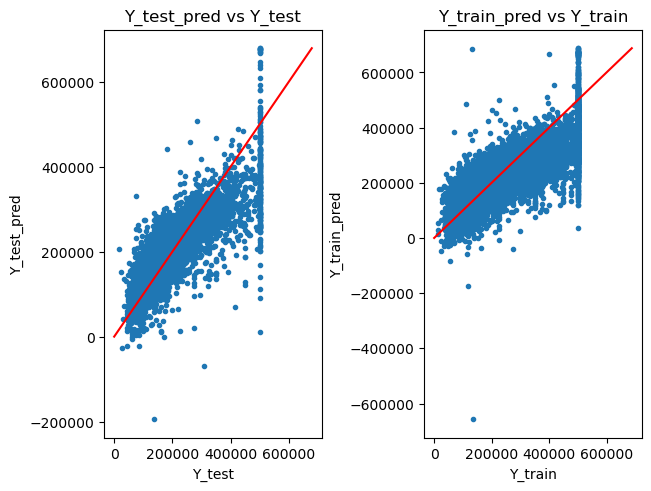

In [22]:
fig, ax = plt.subplots(1,2,constrained_layout=True)
ax[0].set_title('Y_test_pred vs Y_test')
ax[0].plot(Y_test, Y_test_pred, '.')
ymax=np.max([Y_test.max(), Y_test_pred.max()])
ax[0].plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
ax[0].set_xlabel('Y_test')
ax[0].set_ylabel('Y_test_pred')
ax[1].set_title('Y_train_pred vs Y_train')
ax[1].plot(Y_train, Y_train_pred, '.')
ymax=np.max([Y_train.max(), Y_train_pred.max()])
ax[1].plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
ax[1].set_xlabel('Y_train')
ax[1].set_ylabel('Y_train_pred')

Text(0.5, 1.0, 'prediction')

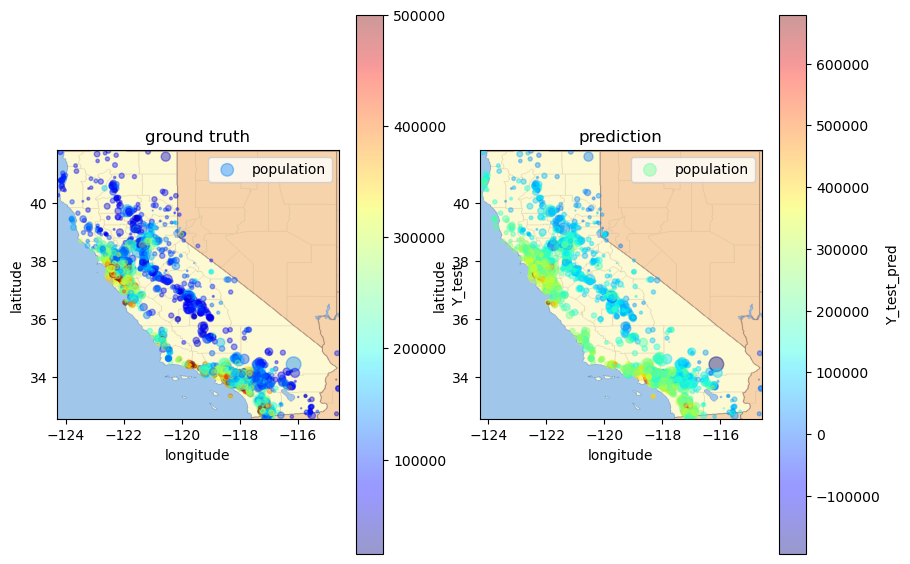

In [23]:
data=scaler.inverse_transform(X_test)
data=pd.DataFrame(data, columns=X_columns)
data['Y_test']=Y_test
data['Y_test_pred']=Y_test_pred

x1 = min(data["longitude"].values)
x2 = max(data["longitude"].values)
y1 = min(data["latitude"].values)
y2 = max(data["latitude"].values)

fig, ax =plt.subplots(1,2)
data.plot(ax=ax[0], kind="scatter", x="longitude", y="latitude",
          s=data['population']/100, label="population",
          c="Y_test", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, figsize=(10,7))
ax[0].imshow(california_img,extent=[x1,x2,y1,y2])
ax[0].set_title('ground truth')
data.plot(ax=ax[1], kind="scatter", x="longitude", y="latitude",
          s=data['population']/100, label="population",
          c="Y_test_pred", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, figsize=(10,7))
ax[1].imshow(california_img,extent=[x1,x2,y1,y2])
ax[1].set_title('prediction')

In [24]:
Y_test.shape

(4128,)

### 2. KNeighborsRegressor from sklearn.neighbors.KNeighborsRegressor

In [26]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)

In [27]:
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [28]:
Y_train_pred = knn.predict(X_train)
Y_test_pred = knn.predict(X_test)

In [29]:
print('Evaluate model on traning set')
MSE = np.mean((Y_train - Y_train_pred)**2)
MAE = np.mean(np.abs(Y_train - Y_train_pred))
MAPE =  np.mean(np.abs(Y_train - Y_train_pred)/Y_train)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)
print('Evaluate model on testing set')
MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
MAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)

Evaluate model on traning set
MSE= 2536673978.865168
MAE= 33662.21060565276
MAPE= 0.18121674624371772
Evaluate model on testing set
MSE= 3995148983.11626
MAE= 42816.31531007752
MAPE= 0.23257627257406085


In [30]:
r2_train = knn.score(X_train, Y_train)
r2_test = knn.score(X_test, Y_test)
print(r2_train)
print(r2_test)

0.8104569815511709
0.6936129481146869


Text(0, 0.5, 'Y_train_pred')

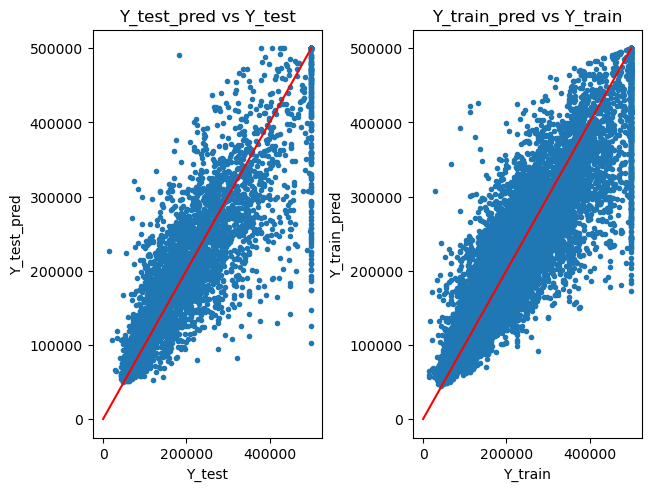

In [31]:
fig, ax = plt.subplots(1,2,constrained_layout=True)
ax[0].set_title('Y_test_pred vs Y_test')
ax[0].plot(Y_test, Y_test_pred, '.')
ymax=np.max([Y_test.max(), Y_test_pred.max()])
ax[0].plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
ax[0].set_xlabel('Y_test')
ax[0].set_ylabel('Y_test_pred')
ax[1].set_title('Y_train_pred vs Y_train')
ax[1].plot(Y_train, Y_train_pred, '.')
ymax=np.max([Y_train.max(), Y_train_pred.max()])
ax[1].plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
ax[1].set_xlabel('Y_train')
ax[1].set_ylabel('Y_train_pred')

Text(0.5, 1.0, 'prediction')

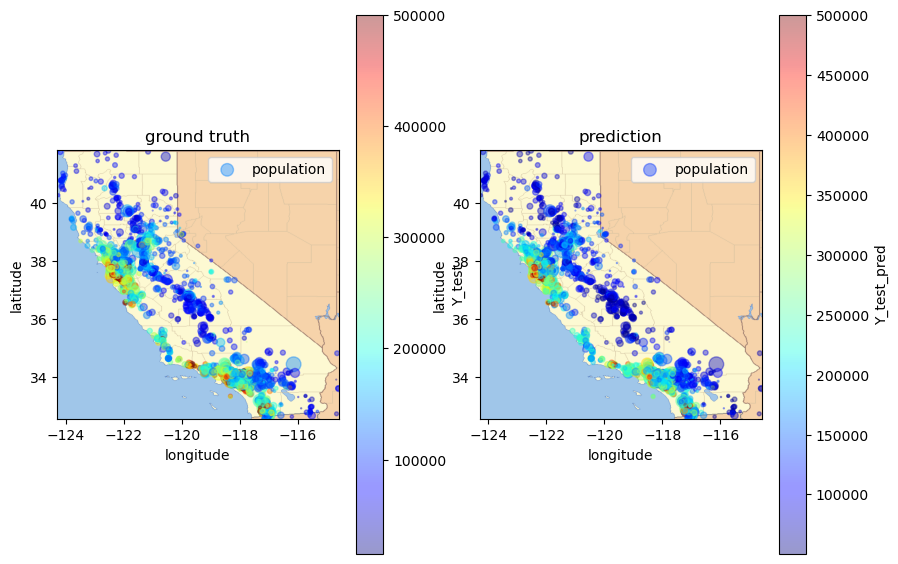

In [32]:
data=scaler.inverse_transform(X_test)
data=pd.DataFrame(data, columns=X_columns)
data['Y_test']=Y_test
data['Y_test_pred']=Y_test_pred

x1 = min(data["longitude"].values)
x2 = max(data["longitude"].values)
y1 = min(data["latitude"].values)
y2 = max(data["latitude"].values)

fig, ax =plt.subplots(1,2)
data.plot(ax=ax[0], kind="scatter", x="longitude", y="latitude",
          s=data['population']/100, label="population",
          c="Y_test", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, figsize=(10,7))
ax[0].imshow(california_img,extent=[x1,x2,y1,y2])
ax[0].set_title('ground truth')
data.plot(ax=ax[1], kind="scatter", x="longitude", y="latitude",
          s=data['population']/100, label="population",
          c="Y_test_pred", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, figsize=(10,7))
ax[1].imshow(california_img,extent=[x1,x2,y1,y2])
ax[1].set_title('prediction')

### 3(a). RandomForestRegressor from sklearn.ensemble

In [34]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=20, max_depth=10, random_state=0)

In [35]:
RF.fit(X_train,Y_train)

RandomForestRegressor(max_depth=10, n_estimators=20, random_state=0)

In [36]:
Y_train_pred = RF.predict(X_train)
Y_test_pred = RF.predict(X_test)

In [37]:
print('Evaluate model on traning set')
MSE = np.mean((Y_train - Y_train_pred)**2)
MAE = np.mean(np.abs(Y_train - Y_train_pred))
MAPE =  np.mean(np.abs(Y_train - Y_train_pred)/Y_train)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)
print('Evaluate model on testing set')
MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
MAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)

Evaluate model on traning set
MSE= 1945491639.701538
MAE= 30476.40665806301
MAPE= 0.17315781021344928
Evaluate model on testing set
MSE= 2942752580.893462
MAE= 36889.27001864772
MAPE= 0.20957638311965976


In [38]:
r2_train = RF.score(X_train, Y_train)
r2_test = RF.score(X_test, Y_test)
print(r2_train)
print(r2_test)

0.8546307642100066
0.7743209848998999


Text(0, 0.5, 'Y_train_pred')

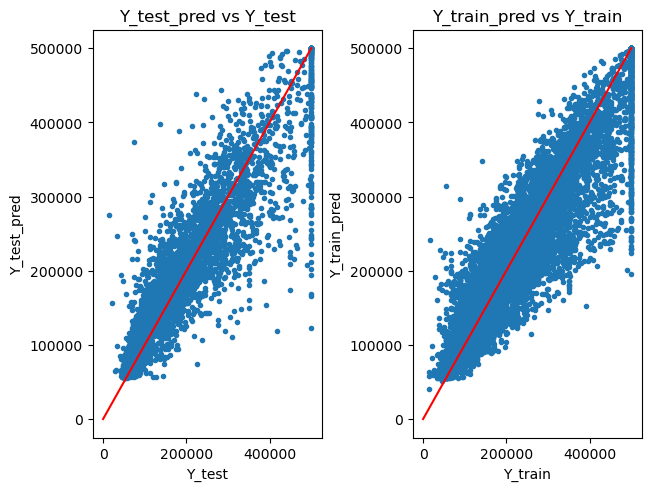

In [39]:
fig, ax = plt.subplots(1,2,constrained_layout=True)
ax[0].set_title('Y_test_pred vs Y_test')
ax[0].plot(Y_test, Y_test_pred, '.')
ymax=np.max([Y_test.max(), Y_test_pred.max()])
ax[0].plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
ax[0].set_xlabel('Y_test')
ax[0].set_ylabel('Y_test_pred')
ax[1].set_title('Y_train_pred vs Y_train')
ax[1].plot(Y_train, Y_train_pred, '.')
ymax=np.max([Y_train.max(), Y_train_pred.max()])
ax[1].plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
ax[1].set_xlabel('Y_train')
ax[1].set_ylabel('Y_train_pred')

Text(0.5, 1.0, 'prediction')

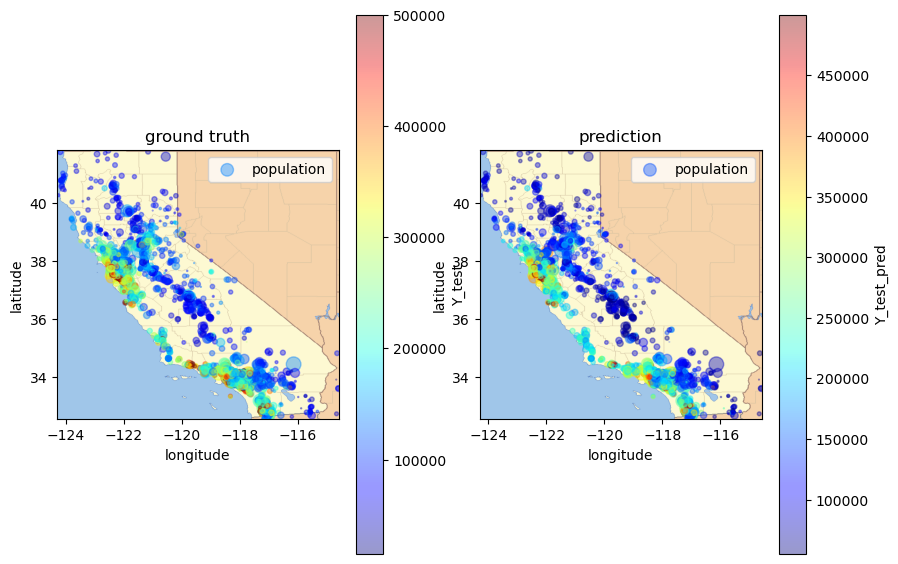

In [40]:
data=scaler.inverse_transform(X_test)
data=pd.DataFrame(data, columns=X_columns)
data['Y_test']=Y_test
data['Y_test_pred']=Y_test_pred

x1 = min(data["longitude"].values)
x2 = max(data["longitude"].values)
y1 = min(data["latitude"].values)
y2 = max(data["latitude"].values)

fig, ax =plt.subplots(1,2)
data.plot(ax=ax[0], kind="scatter", x="longitude", y="latitude",
          s=data['population']/100, label="population",
          c="Y_test", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, figsize=(10,7))
ax[0].imshow(california_img,extent=[x1,x2,y1,y2])
ax[0].set_title('ground truth')
data.plot(ax=ax[1], kind="scatter", x="longitude", y="latitude",
          s=data['population']/100, label="population",
          c="Y_test_pred", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, figsize=(10,7))
ax[1].imshow(california_img,extent=[x1,x2,y1,y2])
ax[1].set_title('prediction')

### 3(b). Find the best max_depth in RandomForestRegressor
In the previous sub-task, we set max_depth=10. <br>
In this section, we will use grid-search to find the best value of max_depth.

In [41]:
max_depth_list = []
for i in range(10):
    max_depth_list.append(1 +(i*10))
max_depth_list

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91]

In [42]:
MAE_train_list=[]
MAE_val_list=[]
for m in max_depth_list:
    from sklearn.ensemble import RandomForestRegressor
    RF1 = RandomForestRegressor(n_estimators=20, max_depth=m, random_state=0)
    RF1.fit(X_train,Y_train)
    Y_train_pred = RF1.predict(X_train)
    Y_val_pred = RF1.predict(X_val)
    MAE_t = np.mean(np.abs(Y_train - Y_train_pred))
    MAE_v = np.mean(np.abs(Y_val - Y_val_pred))
    MAE_train_list.append(MAE_t)
    MAE_val_list.append(MAE_v)
    


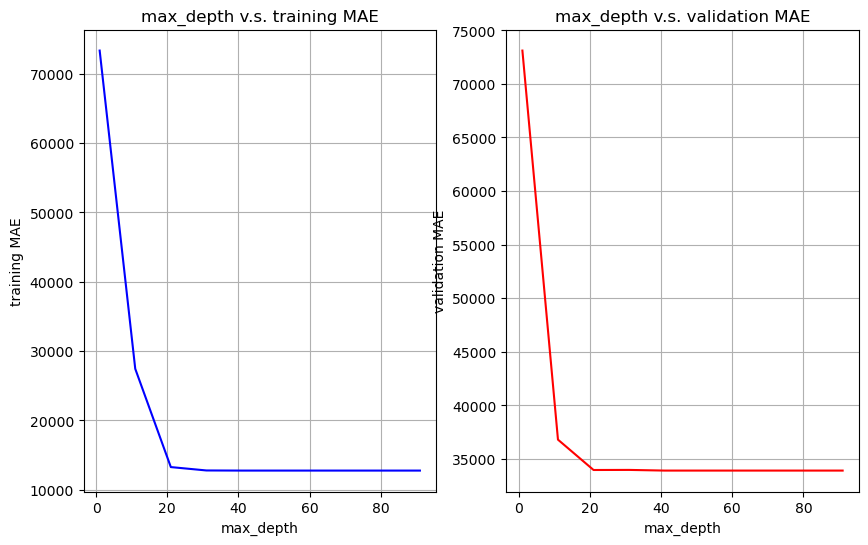

In [43]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].plot(max_depth_list, MAE_train_list, 'b')
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('training MAE')
ax[0].set_title('max_depth v.s. training MAE')
ax[0].grid(True)
ax[1].plot(max_depth_list, MAE_val_list, 'r')
ax[1].set_xlabel('max_depth')
ax[1].set_ylabel('validation MAE')
ax[1].set_title('max_depth v.s. validation MAE')
ax[1].grid(True)

In [44]:
max_depth_best = np.argmax(MAE_val_list)
max_depth_best

0

In [45]:
max_depth_best = max_depth_best + 1
RF1 = RandomForestRegressor(n_estimators=20, max_depth=max_depth_best, random_state=0)
RF1.fit(X_train,Y_train)
Y_test_pred = RF1.predict(X_test)
print('Evaluate model on testing set')
MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
MAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)

Evaluate model on testing set
MSE= 9082479502.327148
MAE= 74090.63303250594
MAPE= 0.490488899276799


MAPE on the test set is reduced by using max_depth=20

We can obtain feature importances stored in RF.feature_importances_

<BarContainer object of 13 artists>

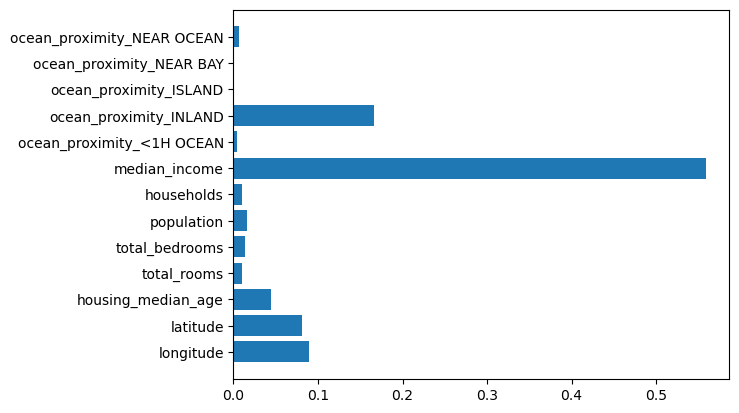

In [46]:
plt.barh(y=X_columns, width=RF.feature_importances_)

### 4. XGBRegressor


In [48]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [49]:
max_depth_list = []
for i in range(30):
    max_depth_list.append(i)
max_depth_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [50]:
MAE_train_list=[]
MAE_val_list=[]
XGB = XGBRegressor(n_estimators=20, random_state=0, objective = 'reg:squarederror')
for m in max_depth_list:
    print(m)
    XGB.set_params(max_depth=m)
    XGB.fit(X_train, Y_train)
    Y_train_pred = XGB.predict(X_train)
    Y_val_pred = XGB.predict(X_val)
    MAE_train = np.mean(np.abs(Y_train - Y_train_pred))
    MAE_val = np.mean(np.abs(Y_val - Y_val_pred))
    MAE_train_list.append(MAE_train)
    MAE_val_list.append(MAE_val)
    
MAE_val_list
MAE_train_list

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


[498.4447885998486,
 52868.048072110534,
 46068.04976262828,
 39995.838923441705,
 36085.66115857377,
 32737.80153989317,
 29699.925662958445,
 26162.347793205332,
 22719.23228807411,
 18994.532412937417,
 15376.383672742471,
 11723.399843723713,
 8691.409319928709,
 6365.319141019305,
 4352.913038489443,
 3000.4834879447762,
 2218.90720553289,
 1656.9256728160751,
 1403.2109445974934,
 1051.9222250115663,
 840.1142169361962,
 761.4171815854223,
 682.2844978917816,
 645.6654442767917,
 578.1743976331175,
 569.6107124831763,
 533.1425103045087,
 530.3942156744196,
 522.8439323004291,
 515.0814053562416]

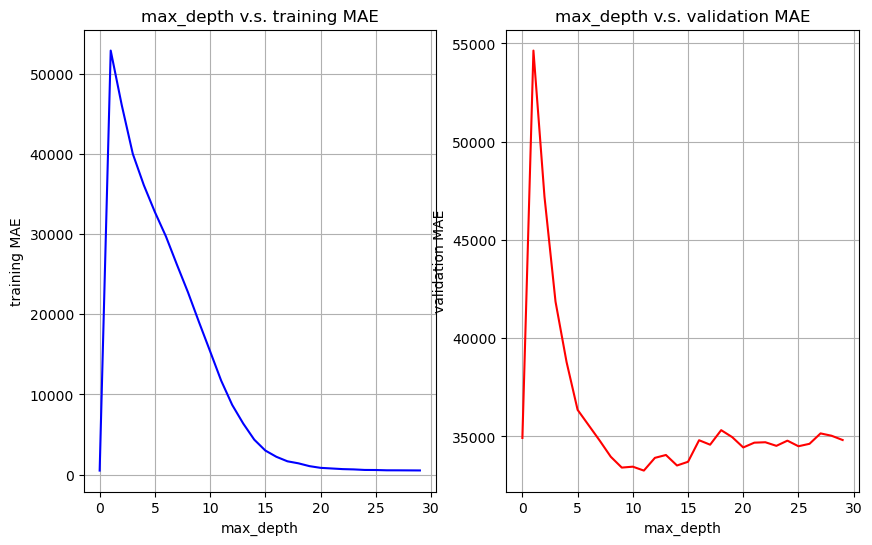

In [51]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].plot(max_depth_list, MAE_train_list, 'b')
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('training MAE')
ax[0].set_title('max_depth v.s. training MAE')
ax[0].grid(True)
ax[1].plot(max_depth_list, MAE_val_list, 'r')
ax[1].set_xlabel('max_depth')
ax[1].set_ylabel('validation MAE')
ax[1].set_title('max_depth v.s. validation MAE')
ax[1].grid(True)

In [52]:
max_depth_best = np.argmax(MAE_val_list)
max_depth_best

1

In [53]:
XGB = XGBRegressor(n_estimators=20, random_state=0, objective = 'reg:squarederror')
XGB.set_params(max_depth=max_depth_best)
XGB.fit(X_train, Y_train)
Y_train_pred = XGB.predict(X_train)
Y_val_pred = XGB.predict(X_val)
MAE_train = np.mean(np.abs(Y_train - Y_train_pred))
MAE_val = np.mean(np.abs(Y_val - Y_val_pred))

print(MAE_train)
print(MAE_val)

52868.048072110534
54629.10449928117
